In [1]:
from googleapiclient.discovery import build
import pandas as pd
from IPython.display import JSON
from dateutil import parser

# Data viz packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#NLP
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Functions
import functions

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\qasse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# api_key = ''

In [3]:
channel_ids = ['UCoOae5nYA7VqaXzerajD0lg',
              ]

In [4]:
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [5]:
channel_stats = functions.get_channels_stats(youtube, channel_ids)

In [6]:
playlistId="UUoOae5nYA7VqaXzerajD0lg"

In [7]:
# Get video IDs
video_ids = functions.get_video_ids(youtube, playlistId)

In [8]:
# Get video details
video_df = functions.get_video_detalis(youtube, video_ids)

## Data Pre-processing

In [9]:
numeric_cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [10]:
# Publish day in the week
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x))
video_df['publishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A"))

In [11]:
import isodate

video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].apply(lambda x: x.total_seconds()).astype(int)


In [12]:
# Add tag count
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [13]:
video_df

,video_id,channelTitle,title,discreption,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,publishDayName,durationSecs,tagCount
0,xaqO9UfHvYE,Ali Abdaal,Why you're so judgemental 👀,None,"[Ali Abdaal, Ali abdal]",2023-06-12 12:00:47+00:00,19472.0,1958.0,NaN,22.0,PT57S,hd,false,Monday,57,2
1,xaqO9UfHvYE,Ali Abdaal,Why you're so judgemental 👀,None,"[Ali Abdaal, Ali abdal]",2023-06-12 12:00:47+00:00,19472.0,1958.0,NaN,22.0,PT57S,hd,false,Monday,57,2
2,xaqO9UfHvYE,Ali Abdaal,Why you're so judgemental 👀,None,"[Ali Abdaal, Ali abdal]",2023-06-12 12:00:47+00:00,19472.0,1958.0,NaN,22.0,PT57S,hd,false,Monday,57,2
3,waz5UpXZH3o,Ali Abdaal,The remarkable story of Oprah Winfrey ⭐️,None,"[Ali Abdaal, Ali abdal]",2023-06-08 12:00:50+00:00,24103.0,1441.0,NaN,20.0,PT51S,hd,false,Thursday,51,2
4,waz5UpXZH3o,Ali Abdaal,The remarkable story of Oprah Winfrey ⭐️,None,"[Ali Abdaal, Ali abdal]",2023-06-08 12:00:50+00:00,24103.0,1441.0,NaN,20.0,PT51S,hd,false,Thursday,51,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,XJHM0fEH3ss,Ali Abdaal,Rolling in the Deep (Adele) - Duranka Perera &...,None,"[rolling in the deep, adele, cover, acoustic]",2016-04-05 09:05:29+00:00,53583.0,672.0,NaN,31.0,PT2M29S,hd,false,Tuesday,149,4
1940,XJHM0fEH3ss,Ali Abdaal,Rolling in the Deep (Adele) - Duranka Perera &...,None,"[rolling in the deep, adele, cover, acoustic]",2016-04-05 09:05:29+00:00,53583.0,672.0,NaN,31.0,PT2M29S,hd,false,Tuesday,149,4
1941,LQ3Mu8A7gjY,Ali Abdaal,All of Me (John Legend) - Duranka Perera,None,None,2016-03-27 19:30:11+00:00,110282.0,1381.0,NaN,131.0,PT1M43S,hd,false,Sunday,103,0
1942,LQ3Mu8A7gjY,Ali Abdaal,All of Me (John Legend) - Duranka Perera,None,None,2016-03-27 19:30:11+00:00,110282.0,1381.0,NaN,131.0,PT1M43S,hd,false,Sunday,103,0


## EDA

### Best performing videos

In [14]:
video_df['viewCount'] = video_df['viewCount'].astype(int)


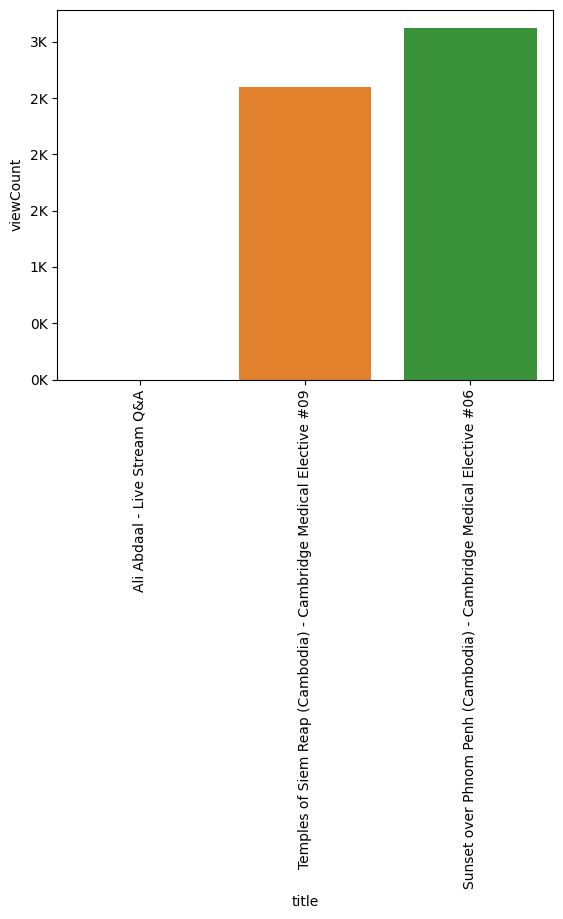

In [15]:
ax = sns.barplot(x='title', y='viewCount', data=video_df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x / 1000) + 'K'))


### View distirbution per video

<Axes: >

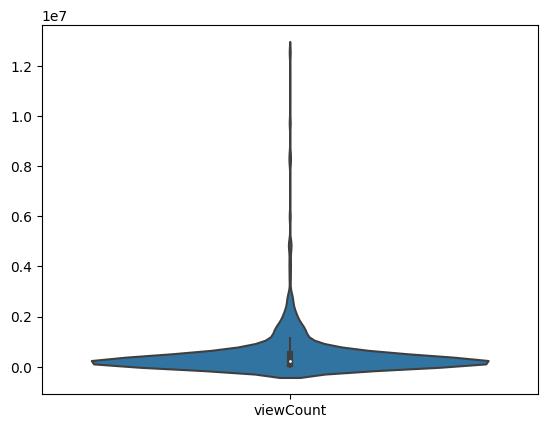

In [16]:
data_to_plot = video_df[['channelTitle', 'viewCount']]
sns.violinplot(data=data_to_plot)

### Views vs. likes and comments

<Axes: xlabel='likeCount', ylabel='viewCount'>

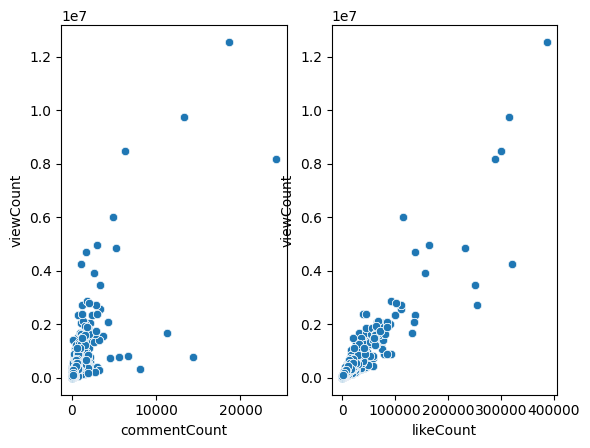

In [17]:
fig, ax = plt.subplots(1, 2)
sns.scatterplot(data=video_df, x='commentCount', y='viewCount', ax=ax[0])
sns.scatterplot(data=video_df, x='likeCount', y='viewCount', ax=ax[1])


### Video duration

<Axes: xlabel='durationSecs', ylabel='Count'>

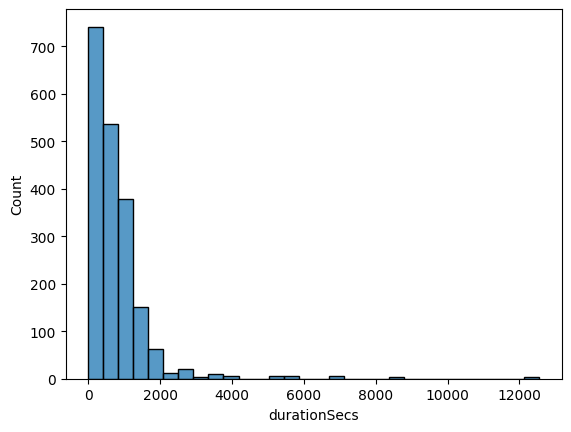

In [18]:
sns.histplot(data=video_df, x='durationSecs', bins=30)


### Wordcloud for video titles

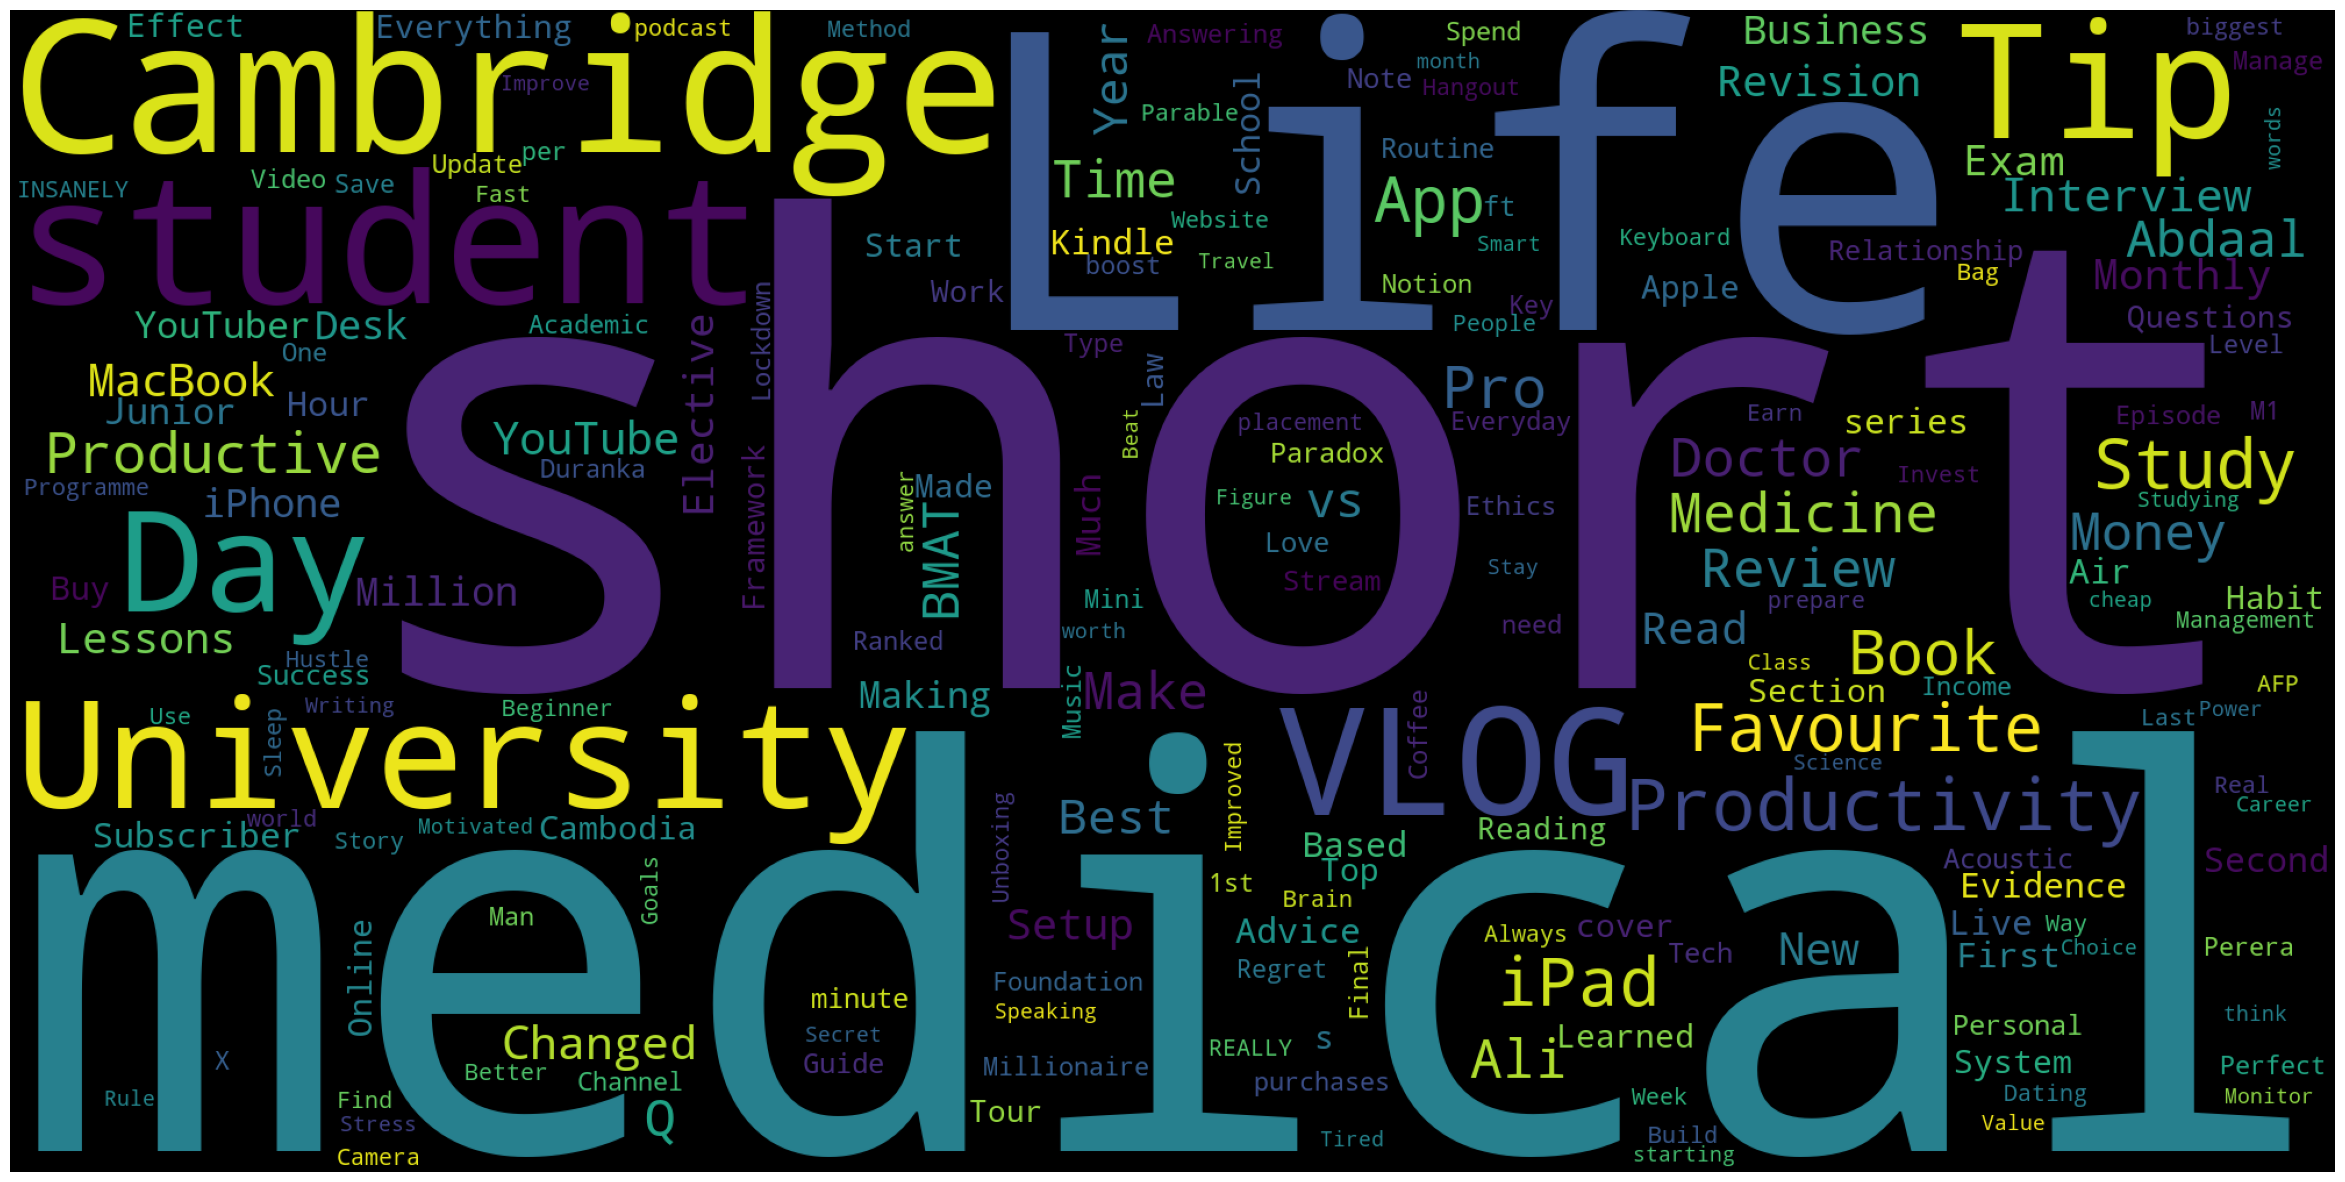

In [19]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

def plot_cloud(wordcloud):
    plt.figure(figsize=(30,20))
    plt.imshow(wordcloud)
    plt.axis("off")

wordcloud = WordCloud(width=2000, height=1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

### Upload schedule

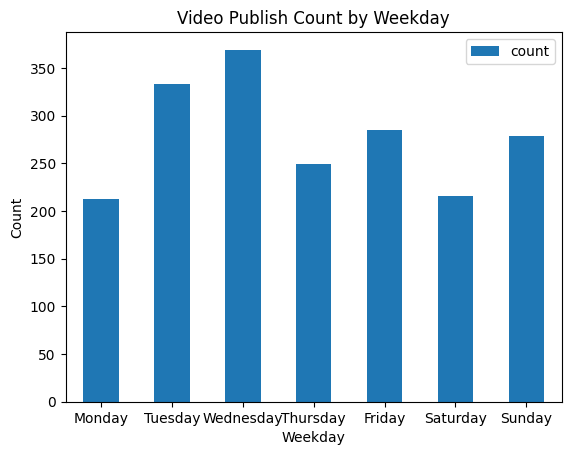

In [20]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Assuming weekday names are stored in the 'publishedDayName' column
day_df = pd.DataFrame(video_df['publishDayName'].value_counts()).reindex(weekdays)

ax = day_df.plot.bar(rot=0)
ax.set_xlabel('Weekday')
ax.set_ylabel('Count')
ax.set_title('Video Publish Count by Weekday')

plt.show()